In [1]:
# -*- coding: utf-8 -*-
"""
Python For Data Analysis And Scientific Computing
UC Berkeley Extension

Final Project -- Stock Performance Calculator

David Loaiza -- dave.loaiza@gmail.com
John Graham -- johngraham415@gmail.com

"""
  
from datetime import date
import numpy as np
from os import path
import csv
#import simplejson as json
import yahoo_finance as yf
import pandas
import pandas_datareader.data as web
import datetime
from pylab import *
from scipy import *

In [2]:
#%%
def update_portfolio(TICKER, QUANT, PRICE, DAY=date.today().day, MON=date.today().month, YEAR=date.today().year):
    """Writes stock purchases to open_lots4.txt file which stores portfolio
    TICKER format is str4
    QUANT format is int
    PRICE format is float
    DAY format is int, defaults to current day
    MON format is int, defaults to current month
    YEAR format is int, defautls to curent year
    open_lots4.txt is a comma separated file, with each line representing a stock purchase lot: TICKER,QUANTITY,PRICE,PURCHASEDATE
    """ 
   #%% 
    if path.exists('open_lots4.txt') == True:      #Check to see if file exists
        open_lot = open('open_lots4.txt', 'a')     #if exists, open in 'Append' 
    else:
        open_lot = open('open_lots4.txt', 'w')     #else, opens in 'write' mode to create first time
  #%%  
    DATE = date(YEAR, MON, DAY)
    open_lot.writelines(str(TICKER)+','+str(QUANT)+','+str(PRICE)+','+str(DATE)+'\n')
    open_lot.close()
    return 'Adding purchase of %s shares of %s at a price of $ %s on %s to portfolio.' % (QUANT, TICKER, PRICE, DATE)
#%%

In [3]:
update_portfolio('^GSPC',1,2257.83,3,1,2017)
update_portfolio('XOM',300,123.45,3,1,2017)
update_portfolio('CVX',100,75.00,3,1,2017)
update_portfolio('MMM',50,122.97,3,1,2017)
update_portfolio('MCD',75,92.02,3,1,2017)
update_portfolio('WMT',150,67.22,3,1,2017)
update_portfolio('UTX',125,20.2,3,1,2017)
update_portfolio('BA',225,87.34)
update_portfolio('CAT',250,455.34)
update_portfolio('JPM',200,234.12)
update_portfolio('HPQ',400,80.07)


'Adding purchase of 400 shares of HPQ at a price of $ 80.07 on 2017-05-21 to portfolio.'

In [4]:
def stock_list():
    """ Parses the open_lots4.txt portfolio file and returns a list of the stock tickers of those stocks held in the Portfolio """
    open_lot = open('final_project/open_lots4.txt', 'r')     #open open_lots4.txt file for reading
    stock_list = []
    reader = csv.DictReader(open_lot, fieldnames=('Stock', 'Quant', 'Price', 'Date'))
    for row in reader:
        stock_list.append(row['Stock'])
    stock_list = list(set(stock_list))
    return stock_list                                       #returns a list that can be iterated through to find daily prices


In [5]:
def get_price(stock_list):
    """ Takes a list of strings (stock tickers), and uses each ticker string to query Yahoo finance API and pull most current share price """
    stock_prices = {'Share':'Latest Price'}                 #dictionary for storing stock/price pairs
    curr_price = open('final_project/curr_price.txt', 'w')  #file for writing latest stock price
    for s in stock_list:                                    #loop through list of stocks, query Yahoo with each
        share = yf.Share(s)
        c_price = share.get_price()
        stock_prices.update({s:c_price})
#    curr_price.write(str(stock_prices))
    json.dump(stock_prices,curr_price)    
    curr_price.close()
    return stock_prices

In [6]:
def get_price_hist():
    """ Function parses open_lots4.txt portfolio file, returns historical data including daily prices for all stocks since their purchase date """
    open_lot = open('open_lots4.txt', 'r')       #file containing all open lots
    reader = csv.DictReader(open_lot, fieldnames=('Stock', 'Quant', 'Price', 'Date'))
    stock_dates = {}                                          #to be used to populate Yahoo query with stock tickers and dates for historical data 
    for row in reader:                                        #populate stock_dates dictionary
        stock_dates.update({row['Stock']:row['Date']})
    print(stock_dates)
    open_lot.close()
    price_hist = open('price_hist.txt', 'w')    #file for writing historical price data
    today = str(date.today().year)
    if len(str(date.today().month)) == 1:
        today = today+'-0'+str(date.today().month)
    else:
        today = today+'-'+str(date.today().month)
    if len(str(date.today().day)) == 1:
        today = today+'-0'+str(date.today().day)
    else:
        today = today+'-'+str(date.today().day)
    print(today)
    for stock, date1 in stock_dates.items():                            #iterate through stock_dates dictionary
            share = yf.Share(stock)
            print(stock + date1 + today)
            print(share.get_historical(date1, today))                                
            #json.dump(share.get_historical(date1, today),price_hist)
            price_hist.close()
            price_hist = open('final_project/price_hist.txt', 'a')
    price_hist.close()


In [7]:
df = 7
def importy(filename):
        df = pandas.read_csv(filename)
        df.columns = ['Stock', 'Quant', 'Price', 'Date']
        return df
        

df = importy('open_lots4.txt') 

In [8]:
df.head()

,Stock,Quant,Price,Date
0,XOM,300,123.45,2017-01-03
1,CVX,100,75.00,2017-01-03
2,MMM,50,122.97,2017-01-03
3,MCD,75,92.02,2017-01-03
4,WMT,150,67.22,2017-01-03


In [9]:
google = yf.Share('GOOG')
google._fetch()

{'AfterHoursChangeRealtime': None,
 'AnnualizedGain': None,
 'Ask': '960.00',
 'AskRealtime': None,
 'AverageDailyVolume': '1419980',
 'Bid': '932.00',
 'BidRealtime': None,
 'BookValue': '209.43',
 'Change': '+3.77',
 'ChangeFromFiftydayMovingAverage': '53.91',
 'ChangeFromTwoHundreddayMovingAverage': '112.54',
 'ChangeFromYearHigh': '-9.10',
 'ChangeFromYearLow': '270.73',
 'ChangePercentRealtime': None,
 'ChangeRealtime': None,
 'Change_PercentChange': '+3.77 - +0.41%',
 'ChangeinPercent': '+0.41%',
 'Commission': None,
 'Currency': 'USD',
 'DaysHigh': '937.76',
 'DaysLow': '931.00',
 'DaysRange': '931.00 - 937.76',
 'DaysRangeRealtime': None,
 'DaysValueChange': None,
 'DaysValueChangeRealtime': None,
 'DividendPayDate': None,
 'DividendShare': None,
 'DividendYield': None,
 'EBITDA': '31.21B',
 'EPSEstimateCurrentYear': '33.88',
 'EPSEstimateNextQuarter': '8.40',
 'EPSEstimateNextYear': '40.41',
 'EarningsShare': '29.59',
 'ErrorIndicationreturnedforsymbolchangedinvalid': None,
 '

In [10]:
def getprice(stockname):
    share = yf.Share(stockname)
    return share.get_price()


getprice('GOOG')

'934.01'

In [11]:
df['CurrentPrice'] = df['Stock'].apply(getprice)        
df.head()

,Stock,Quant,Price,Date,CurrentPrice
0,XOM,300,123.45,2017-01-03,81.93
1,CVX,100,75.00,2017-01-03,106.52
2,MMM,50,122.97,2017-01-03,195.80
3,MCD,75,92.02,2017-01-03,148.15
4,WMT,150,67.22,2017-01-03,78.77


In [12]:
df['CurrentPrice'] = df['CurrentPrice'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
Stock           21 non-null object
Quant           21 non-null int64
Price           21 non-null float64
Date            21 non-null object
CurrentPrice    21 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 920.0+ bytes


In [13]:
df['Performance'] = (df['CurrentPrice'] - df['Price'])/df['Price']*100
df['Unrealized Gain/Loss'] = df['Quant']*(df['CurrentPrice']-df['Price'])
df.head()

,Stock,Quant,Price,Date,CurrentPrice,Performance,Unrealized Gain/Loss
0,XOM,300,123.45,2017-01-03,81.93,-33.633050,-12456.00
1,CVX,100,75.00,2017-01-03,106.52,42.026667,3152.00
2,MMM,50,122.97,2017-01-03,195.80,59.225827,3641.50
3,MCD,75,92.02,2017-01-03,148.15,60.997609,4209.75
4,WMT,150,67.22,2017-01-03,78.77,17.182386,1732.50


In [14]:
def Perf(CurrentPrice,Price):
    return (CurrentPrice - Price)/Price
Perf(7.4,2.5)    

1.9600000000000002

In [15]:
df['PerformanceVectorized'] = np.vectorize(Perf)(df['CurrentPrice'], df['Price'])

In [16]:
df['Stock'].unique()

array(['XOM', 'CVX', 'MMM', 'MCD', 'WMT', 'UTX', 'BA', 'CAT', 'JPM', 'HPQ',
       '^GSPC'], dtype=object)

In [17]:
df.head()

,Stock,Quant,Price,Date,CurrentPrice,Performance,Unrealized Gain/Loss,PerformanceVectorized
0,XOM,300,123.45,2017-01-03,81.93,-33.633050,-12456.00,-0.336330
1,CVX,100,75.00,2017-01-03,106.52,42.026667,3152.00,0.420267
2,MMM,50,122.97,2017-01-03,195.80,59.225827,3641.50,0.592258
3,MCD,75,92.02,2017-01-03,148.15,60.997609,4209.75,0.609976
4,WMT,150,67.22,2017-01-03,78.77,17.182386,1732.50,0.171824


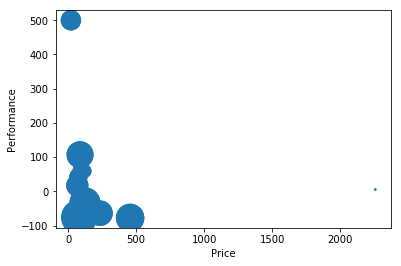

In [18]:
plt.clf()
df.plot.scatter(x='Price', y='Performance',s=df['Quant']*3);

show()

In [19]:
x = df.groupby(['Stock'])['PerformanceVectorized'].mean()


In [20]:
x.head()

Stock
BA     1.069613
CAT   -0.775047
CVX    0.420267
HPQ   -0.762708
JPM   -0.637878
Name: PerformanceVectorized, dtype: float64

In [21]:
type(x)

pandas.core.series.Series

In [22]:
type(np.asarray(x.reset_index))

numpy.ndarray

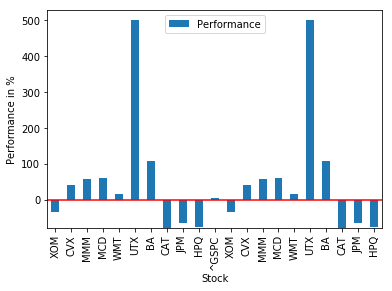

In [23]:
plt.figure()
plt.clf()
df.plot.bar(x = 'Stock', y = 'Performance'); plt.axhline(0, color='r')
plt.ylabel('Performance in %')
plt.show()

126.12


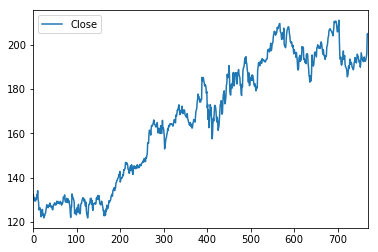

In [24]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
f = web.DataReader("IBM", 'google', start, end)
print(f.ix['2010-01-25','Close'])
f.reset_index()
f.head()

g=f.reset_index()
i=g[['Date','Close']]
i.plot()
plt.show()

126.12


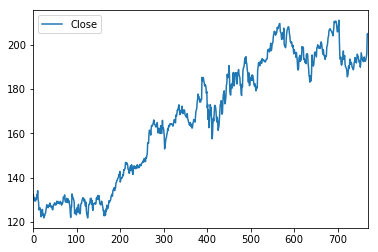

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  770
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1628.433
Method:                       css-mle   S.D. of innovations              2.005
Date:                Sun, 21 May 2017   AIC                           3270.865
Time:                        22:41:13   BIC                           3303.390
Sample:                    01-05-2010   HQIC                          3283.382
                         - 01-25-2013                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.0927      0.063      1.469      0.142        -0.031     0.216
ar.L1.D.Close     0.0087      0.036      0.241      0.809        -0.062     0.079
ar.L2.D.Close     0.0268      0.036     

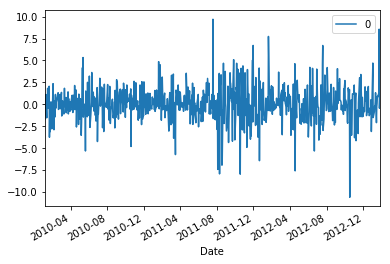

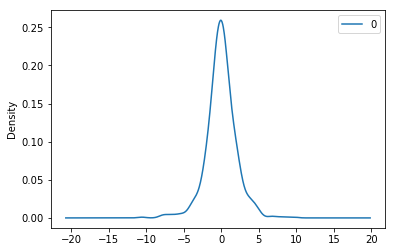

                0
count  770.000000
mean    -0.000642
std      2.006777
min    -10.600097
25%     -0.968123
50%     -0.014294
75%      1.022131
max      9.693168


In [25]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from datetime import date
import numpy as np
from os import path
import csv
import yahoo_finance as yf
import pandas
import pandas_datareader.data as web
import datetime
from pylab import *
from scipy import *

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
f = web.DataReader("IBM", 'google', start, end)
print(f.ix['2010-01-25','Close'])
f.reset_index()
f.head()

g=f.reset_index()
i=g[['Date','Close']]
i.plot()
plt.show()

f.head()

model = ARIMA(f['Close'], order=(5,1,0))

model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())